# Exploring Data with Python

In [47]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/WHdblAQHBms" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

**MATHEMATICAL GOALS**

- Explore data based on a single variable
- Use summary descriptive statistics to understand distributions
- Introduce basic exploratory data analysis

**PYTHON GOALS**

- Introduce basic functionality of Pandas DataFrame
- Use Seaborn to visualize data
- Use Markdown cells to write and format text and images

**MATERIALS**

- [Pandas Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Markdown Cheatsheet](https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf)
- [Seaborn Tutorials and Documentation](https://seaborn.pydata.org/tutorial)


### Introduction to the Jupyter Notebook

The Jupyter notebook has cells that can be used either as code cells or as markdown cells.  Code cells will be where we execute Python code and commands.  Markdown cells allow us to write and type, in order to further explain our work and produce reports.

**Markdown**
-----

Markdown is a simplified markup language for formating text.  For example, to make something bold, we would write `**bold**`.  We can produce headers, insert images, and perform most standard formatting operations using markdown.  Here is a [markdown cheatsheet](https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf).  We can change a cell to a markdown cell with the toolbar, or with the keyboard shortcut `ctrl + m + m`.  Create some markdown cells below, using the cheatsheet that has:

1. Your first and last name as a header
2. An ordered list of the reasons you want to learn Python
3. A blockquote embodying your feelings about mathematics

### Libraries and Jupyter Notebook

Starting with Python it's important to understand how the notebook and Python work together.  For the most part, we will not be writing all our code from scratch.  There are powerful existing libraries that we can make use of with ready made functions that can accomplish most everything we'd want to do.  When using a Jupyter notebook with with Python, we have to import any library that will be used.  Each of the libraries we use today has a standard range of applications:

- **`pandas`**: Data Structure library, structures information in rows and columns and helps you rearrange and navigate the data.
- **`numpy`**: Numerical library, performs many mathematical operations and handles arrays.  Pandas is actually built on top of `numpy`, we will use it primarily for generates arrays of numbers and basic mathematical operations.
- **`matplotlib`**: Plotting Library, makes plots for many situations and has deep customization possibilities.  Useful in wide variety of contexts.
- **`seaborn`**: Statistical plotting library.  Similar to `matplotlib` in that it is a plotting library, `seaborn` produces nice visualizations eliminating much of the work necessary for producing similar visualizations with `matplotlib`.  

To import the libraries, we will write 

```python
import numpy as np
```
and hit `shift + enter` to execute the cell.  This code tells the notebook we want to have the `numpy` library loaded, and when we want to refer to a method from `numpy` we will preface it with `np`.  For example, if we wanted to find the cosine of 10, `numpy` has a cosine function, and we write:

```python
np.cos(10)
```

If we have questions about the function itself, we can use the help function by including a question mark at the end of the function.

```python
np.cos?
```


A second example from `seaborn` involves loading a dataset that is part of the library call "tips".

```python
sns.load_dataset("tips")
```

Here, we are calling something from the Seaborn package (`sns`), using the `load_dataset` function, and the dataset we want it to load is contained in the parenthesis.`("tips")`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.cos(10)

-0.83907152907645244

In [3]:
np.cos?

In [4]:
tips = sns.load_dataset("tips")

In [ ]:
#save the dataset as a csv file
tips.to_csv('data/tips.csv')

### Pandas Dataframe

The Pandas library is the standard Python data structure library.  A `DataFrame` is an object similar to that of an excel spreadsheet, where there is a collection of data arranged in rows and columns.  The datasets from the `Seaborn` package are loaded as `Pandas DataFrame` objects.  We can see this by calling the `type` function.  Further, we can investigate the data by looking at the first few rows with the `head()` function.  

This is an application of a function to a pandas object, so we will write 

```python
tips.head()
```

If we wanted a different number of rows displayed, we could input this in the `()`.  Further, there is a similar function `tail()` to display the end of the `DataFrame`.

In [5]:
type(tips)

pandas.core.frame.DataFrame

In [6]:
#look at first five rows of data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#look at first five rows of total bill column
tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [8]:
tips["total_bill"].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [9]:
#find the mean of the tips column
tips["tip"].mean()

2.9982786885245902

In [10]:
tips["tip"].median()

2.9

In [11]:
tips["tip"].mode()

0    2.0
dtype: float64

In [12]:
tips["smoker"].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [13]:
#groups the dataset by the sex column
group = tips.groupby("sex")

In [14]:
group.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [15]:
group.first()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Female,16.99,1.01,No,Sun,Dinner,2


In [16]:
smoker = tips.groupby("smoker")

In [17]:
smoker.first()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,38.01,3.00,Male,Sat,Dinner,4
No,16.99,1.01,Female,Sun,Dinner,2


In [18]:
group.last()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,17.82,1.75,No,Sat,Dinner,2
Female,18.78,3.00,No,Thur,Dinner,2


In [19]:
group.sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [20]:
group.mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


As shown above, we can refer to specific elements of a DataFrame in a variety of ways.  For more information on this, please consult the Pandas Cheatsheet [here](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).  Use the cheatsheet, google, and the help functions to perform the following operations.

**PROBLEMS: SLICE AND DICE DATAFRAME**

1. Select Column: Create a variable named `size` that contains the size column from the tips dataset.  Use Pandas to determine how many unique values are in the column, i.e. how many different sized dining parties are a part of this dataset.

2. Select Row: Investigate how the `pd.loc` and `pd.iloc` methods work to select rows.  Use each to select a single row, and a range of rows from the tips dataset.

3. Groupby: As shown above, we can group data based on labels, and perform statistical operations within these groups.  Use the `groupby` function to determine whether smokers or non-smokers gave better tips on average.

4. Pivot Table: A Pivot Table takes rows and spreads them into columns.  Try entering:

```python
tips.pivot(columns='smoker', values='tip').describe()
```

What other way might you split rows in the data to make comparisons?

In [21]:
size = tips["size"]

In [22]:
size.head()

0    2
1    3
2    3
3    2
4    4
Name: size, dtype: int64

In [23]:
tips.iloc[4:10]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [24]:
tips.loc[tips["smoker"]=="Yes"].mean()

total_bill    20.756344
tip            3.008710
size           2.408602
dtype: float64

In [25]:
tips.pivot(columns='smoker', values='tip').describe()

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


In [26]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Vizualizing Data with Seaborn

Visualizing the data will help us to see larger patterns and structure within a dataset.  We begin by examining the distribution of a single variable.  It is important to note the difference between a **quantitative** and **categorical** variable here. One of our first strategies for exploring data will be to look at a quantitative variable grouped by some category.  For example, we may ask the questions:

- What is the distribution of tips?
- Is the distribution of tips different across the category gender?
- Is the distribution of tip amounts different across the category smoker or non-smoker?

We will use the **`seaborn`** library to visualize these distributions.  To explore a single distribution we can use the `distplot` function.  For example, below we visualize the tip amounts from our tips data set.

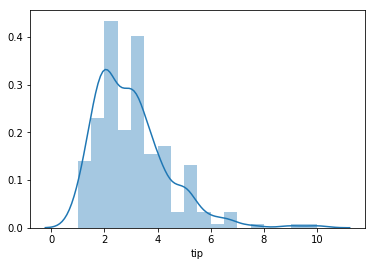

In [28]:
sns.distplot(tips["tip"])

We can now explore the second question, realizing that we will need to structure our data to plot accordingly.  For this distribution plot, we will call two plots.  



In [29]:
male = tips.loc[tips["sex"] == "Male", ["sex", "tip"]]
female = tips.loc[tips["sex"] == "Female", ["sex", "tip"]]

In [30]:
male.head()

,sex,tip
1,Male,1.66
2,Male,3.50
3,Male,3.31
5,Male,4.71
6,Male,2.00


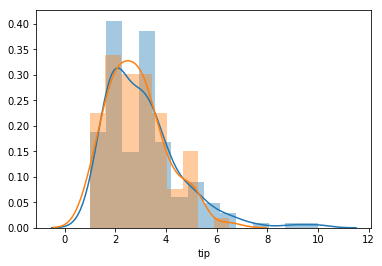

In [31]:
sns.distplot(male["tip"])
sns.distplot(female["tip"])

Another way to compare two or more categories is with a `boxplot`.  Here, we can answer our third question without having to rearannge the original data.

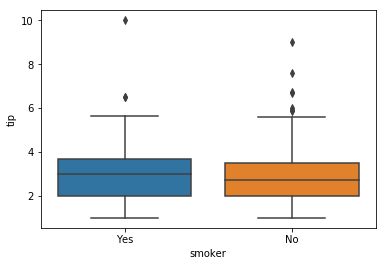

In [32]:
sns.boxplot(x = "smoker",y = "tip", data = tips )

This is a visual display of the data produced by splitting on the smoker category, and comparing the median and quartiles of the two groups.  We can see this numerically with the following code that chains together three methods: `groupby`(groups smokers), `describe`(summary statistics for data), `.T`(transpose--swaps the rows and columns of the output to familiar form).

In [33]:
tips.groupby(by = "smoker")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0


In [34]:
tips.groupby(by = "smoker")["tip"].describe().T

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


##### Problem

What days do men seem to spend more money than women?  Are these the same as when men tip better than women?

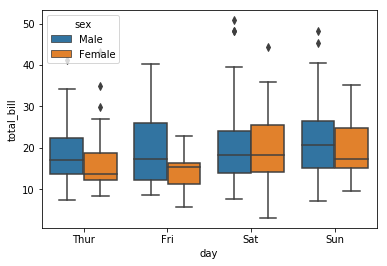

In [36]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips)

#### Factorplots

To group the data even further, we can use a `factorplot`.  For example, we break the plots for gender and total bill apart creating a plot for Dinner and Lunch that break the genders by smoking categories.  Can  you think of a different way to combine categories from the tips data?

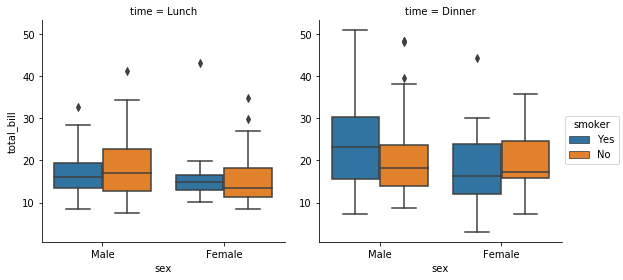

In [37]:
sns.factorplot(x="sex", y="total_bill",
                  hue="smoker", col="time",
                  data=tips, kind="box")

### Playing with More Data

Below, we load two other built-in datasets; the iris and titanic datasets.  Use seaborn to explore distributions of quantitative variables and within groups of categories.  Use the notebook and a markdown cell to write a clear question about both the `iris` and `titanic` datasets. Write a response to these questions that contains both a visualization, and a written response that uses complete sentences to help understand what you see within the data relevant to your questions. 

**Iris Data** 
Dataset with information about three different species of flowers, and corresponding measurements of `sepal_length, sepal_width, petal_length`, and `petal_width`.


**Titanic Data**
Data with information about the passengers on the famed titanic cruise ship including whether or not they survived the crash, how old they were, what class they were in, etc.  

In [38]:
iris = sns.load_dataset('iris')

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


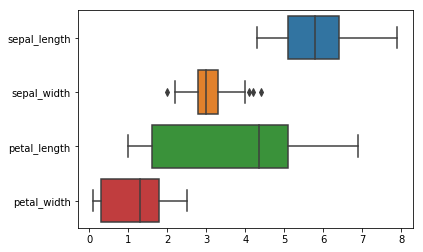

In [40]:
sns.boxplot(data=iris, orient="h")

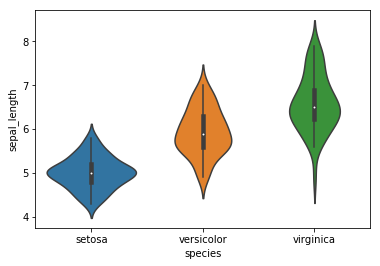

In [41]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

In [42]:
titanic = sns.load_dataset('titanic')

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


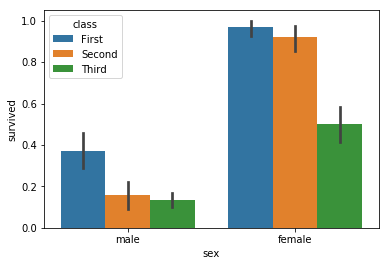

In [44]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

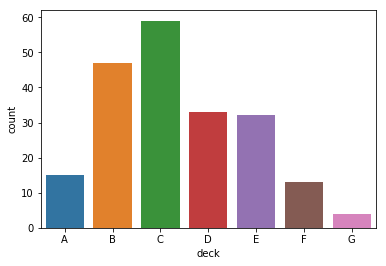

In [45]:
sns.countplot(x="deck", data=titanic)